### Лабораторная работа №2
#### Выполнила Блистунова Валерия
#### группа М8О-401Б-18

In [19]:
# Подключаем необходимые библиотеки
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps

Сгенерируем три массива $$u_{1}...u_{n}\sim N(\mu_{x}, 1)$$ $$v_{1}...v_{n}\sim N(\mu_{x}, \sigma^{2})$$ $$w_{1}...w_{n}\sim R(0, 1)$$
И с их помощью построим две выборки X и Y по следующему правилу:
$$\begin{equation*}
X_{i}= 
 \begin{cases}
   u_{i} &{w_{i} > \delta}\\
   v_{i} &{w_{i} < \delta}
 \end{cases}
\end{equation*}$$
Для Y строим последовательность аналогично.

Sigma:
10


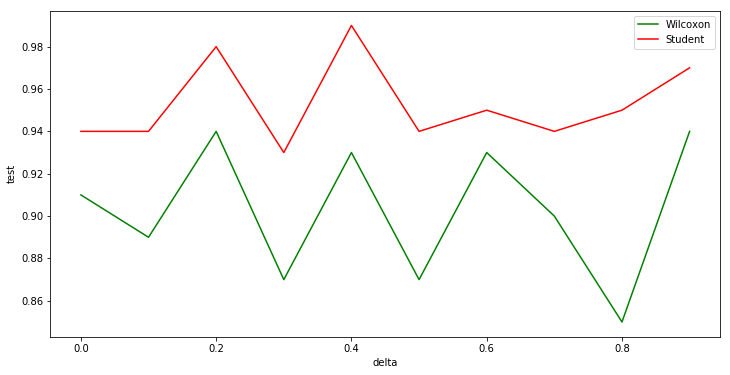

Sigma:
20


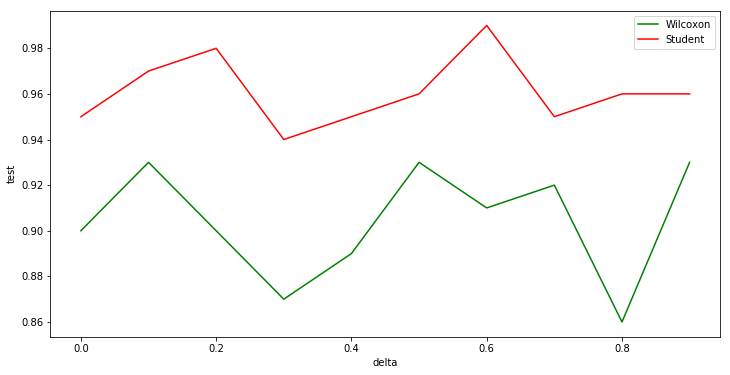

Sigma:
30


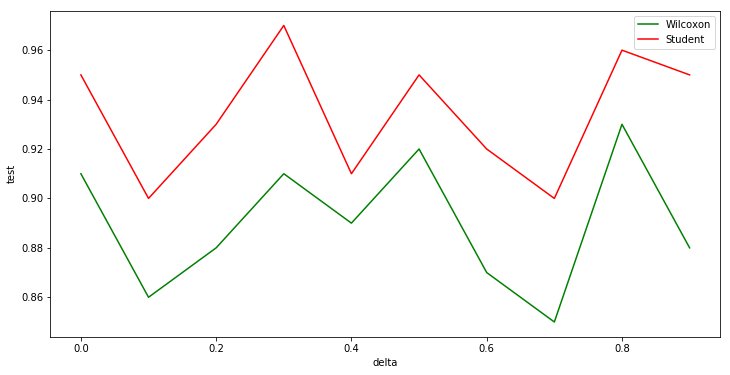

In [20]:
n = 100
m = 100
mu_x = 0
#sigma = 10
alfa = 0.05
tmp1 = 0
tmp2 = 0
for sigma in range(10, 40, 10):
    delta_list = []
    stud_list = []
    wil_list = []
    for k in range(10):
        tmp1 = 0
        tmp2 = 0
        delta = k/10
        for j in range(m):
            x = []
            for i in range(n):
                x.append(i)
            u = sps.norm(loc=mu_x, scale=1).rvs(size=n)
            v = sps.norm(loc=mu_x, scale=sigma).rvs(size=n)
            w = sps.uniform(loc=0, scale=1).rvs(size=n)
            X = np.empty(n)
            Y = np.empty(n)
            for i in range(n):
                if(w[i] > delta):
                    np.append(X,u[i])
                    np.append(Y,u[i])
                else:
                    np.append(X,v[i])
                    np.append(Y,v[i])
            stud_stat, stud_p = sps.ttest_ind(X, Y)
            wil_stat, wil_p = sps.mannwhitneyu(X, Y)
            if(stud_p > alfa):
                tmp1 = tmp1 + 1
            if(wil_p > alfa):
                tmp2 = tmp2 + 1
        stud_list.append(tmp1/m)
        wil_list.append(tmp2/m)
        delta_list.append(delta)
    plt.figure(figsize=(12,6))
    print('Sigma:')
    print(sigma)
    plt.plot(delta_list, wil_list, color = 'green', label='Wilcoxon')
    plt.plot(delta_list, stud_list, color = 'red', label='Student')
    plt.legend()
    plt.xlabel('delta')
    plt.ylabel('test')
    plt.show()

Delta:
0.0


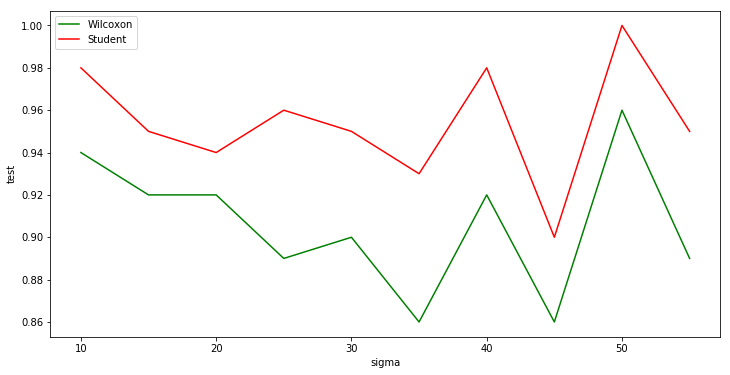

Delta:
0.1


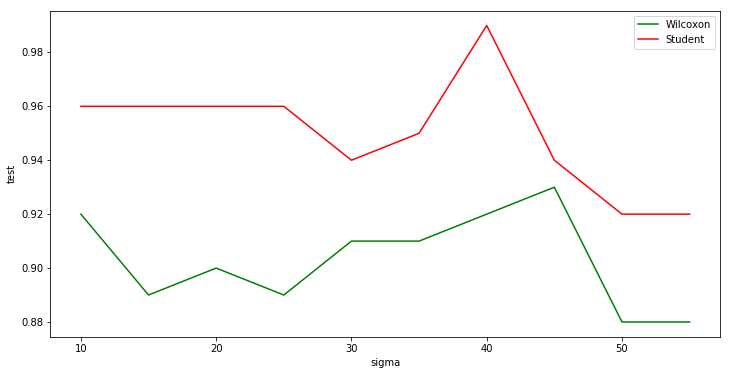

Delta:
0.2


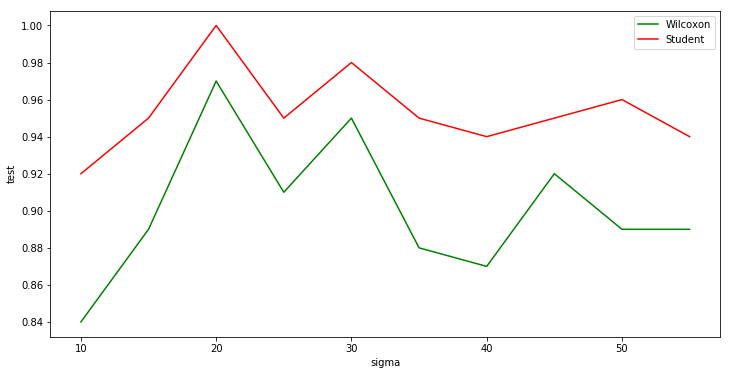

Delta:
0.3


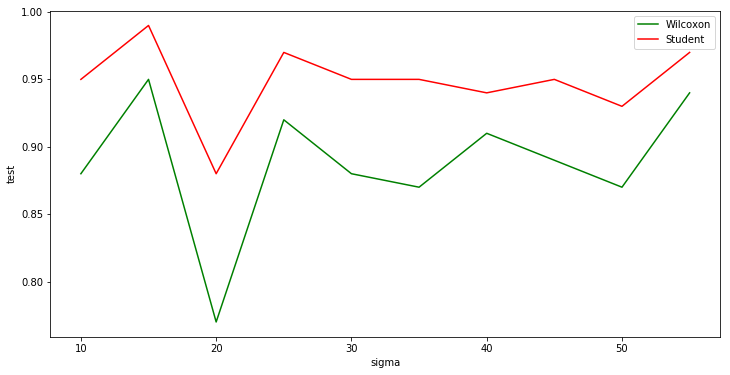

Delta:
0.4


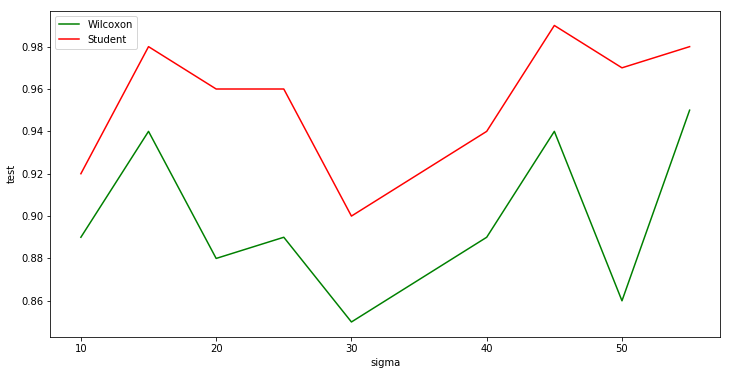

Delta:
0.5


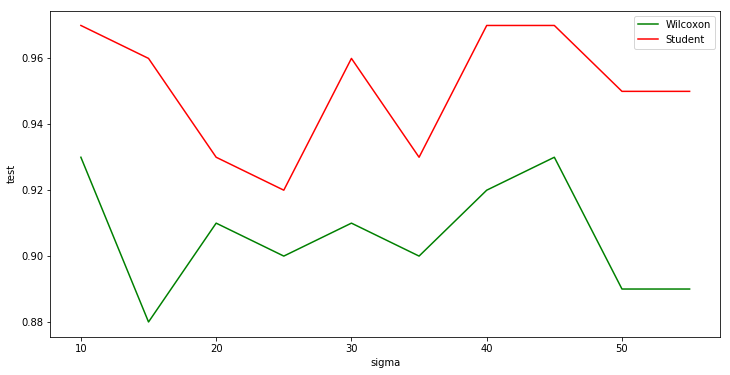

Delta:
0.6


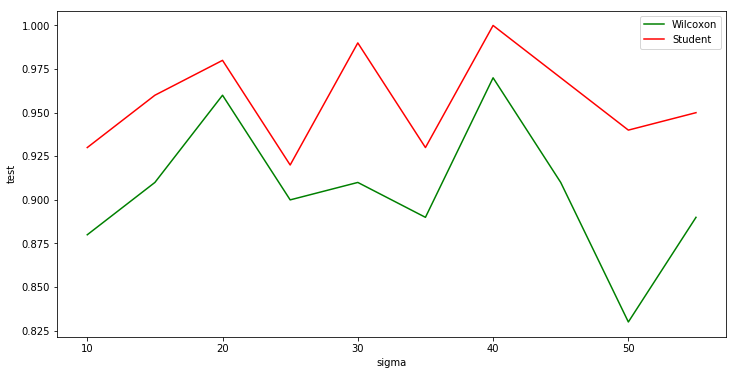

Delta:
0.7


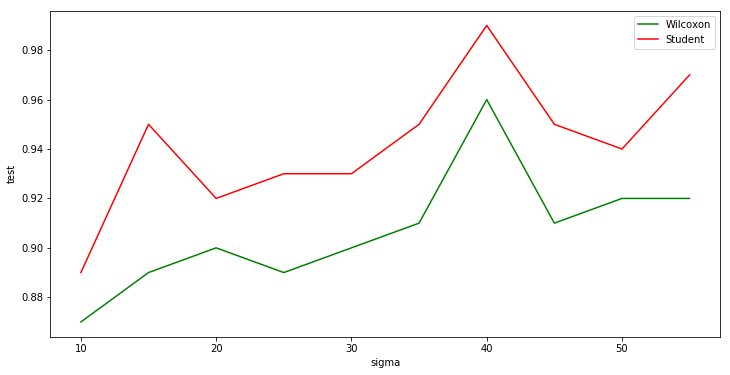

Delta:
0.8


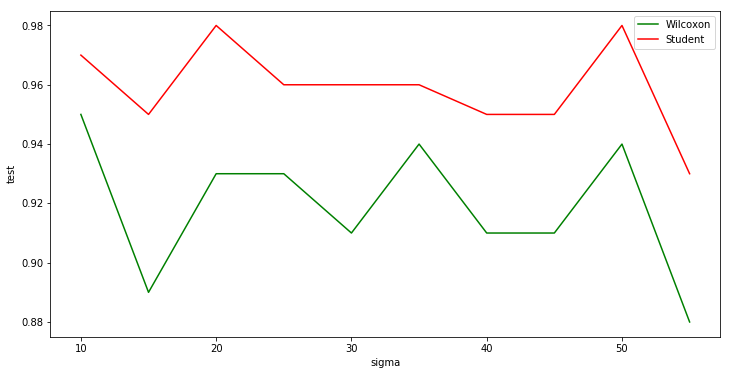

Delta:
0.9


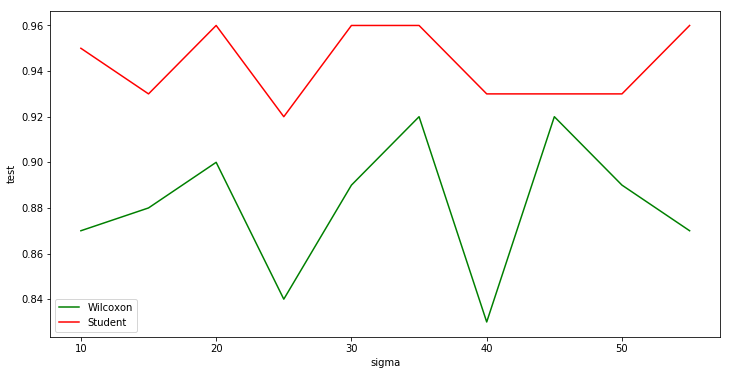

In [22]:
for k in range(10):
    delta = k/10
    sigma_list = []
    stud_list = []
    wil_list = []
    for sigma in range(10, 60, 5):
        tmp1 = 0
        tmp2 = 0
        for j in range(m):
            x = []
            for i in range(n):
                x.append(i)
            u = sps.norm(loc=mu_x, scale=1).rvs(size=n)
            v = sps.norm(loc=mu_x, scale=sigma).rvs(size=n)
            w = sps.uniform(loc=0, scale=1).rvs(size=n)
            X = np.empty(n)
            Y = np.empty(n)
            for i in range(n):
                if(w[i] > delta):
                    np.append(X,u[i])
                    np.append(Y,u[i])
                else:
                    np.append(X,v[i])
                    np.append(Y,v[i])
            stud_stat, stud_p = sps.ttest_ind(X, Y)
            wil_stat, wil_p = sps.mannwhitneyu(X, Y)
            if(stud_p > alfa):
                tmp1 = tmp1 + 1
            if(wil_p > alfa):
                tmp2 = tmp2 + 1
        stud_list.append(tmp1/m)
        wil_list.append(tmp2/m)
        sigma_list.append(sigma)
    plt.figure(figsize=(12,6))
    print('Delta:')
    print(delta)
    plt.plot(sigma_list, wil_list, color = 'green', label='Wilcoxon')
    plt.plot(sigma_list, stud_list, color = 'red', label='Student')
    plt.legend()
    plt.xlabel('sigma')
    plt.ylabel('test')
    plt.show()